In [12]:
import numpy as np
from numpy import linalg
from numba import jit
# aplicando o Método

@jit(nopython=True)
def tridiagonal_matrix(n, below_diag, diag, upper_diag):
    # Criar arrays com os valores das diagonais
    below = np.full(n-1, below_diag)
    middle = np.full(n, diag)
    above = np.full(n-1, upper_diag)

    # Criar a matriz tridiagonal
    M = np.diag(below, k=-1) + np.diag(middle, k=0) + np.diag(above, k=1) # Hamiltoniano

    return M


# @jit(nopython=True)
def Crank_Nicholson(u_init, num_passos_tempo, alpha):
    N = len(u_init)

    u = np.zeros((num_passos_tempo, N)) #inicializando nossa matriz dos dados, onde cada linha é um passo de tempo
    u[0] = u_init

    # coletando as matrizes tridiagonais
    A = tridiagonal_matrix(N-2, -alpha, (2 + 2*alpha), -alpha )
    B = tridiagonal_matrix(N-2, alpha, 2 - 2*alpha, alpha)

    A_inv = linalg.inv(A)
    # A cada iteração, o método calcula todas as posições do passo temporal seguinte (t + dt)
    for i in range(num_passos_tempo - 1):
      #print(A_inv.shape)
      #print(B.shape)
      #print(u[i][1:-1].shape)
      #print(np.zeros(N).shape)
      u[i+1][1:-1] = np.dot(A_inv, np.dot(B, u[i][1:-1]))   # extremidades fixadas em zero
    return u

In [13]:
def gaussian_wavepacket(x, x0, p, omega=0.1):
      '''
      One dimensional Gaussian wavepacket
      '''
  
      x = np.asarray(x)
      g = np.sqrt(1 / np.sqrt(np.pi) / omega) * np.exp(-(x - x0)**2 / 2 / omega**2)
  
      return np.exp(1j * p*(x-x0)) * g

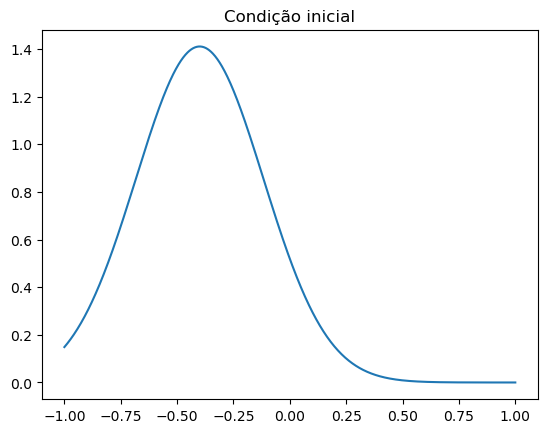

In [37]:
import matplotlib.pyplot as plt
#condicoes iniciais
L = 1 #comprimento do pulso

#definindo malha de pontos
x = np.linspace(-L, L, 1000)

dt = 1e-3
dx = x[1] - x[0]
alpha = -1j*dt / pow(dx, 2)
num_passos_tempo = 4000
#definindo as posições em t=0
psi0 = gaussian_wavepacket(x=x, x0=-0.4, p=2, omega=0.4)
plt.title("Condição inicial")
plt.plot(x, np.abs(psi0)**2)

In [38]:
psi_t = Crank_Nicholson(psi0, num_passos_tempo, alpha)

C:\Users\bito0\AppData\Local\Temp\ipykernel_19964\1528207365.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  u[0] = u_init
C:\Users\bito0\AppData\Local\Temp\ipykernel_19964\1528207365.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  u[i+1][1:-1] = np.dot(A_inv, np.dot(B, u[i][1:-1]))   # extremidades fixadas em zero


In [39]:
psi_t.shape

(4000, 1000)

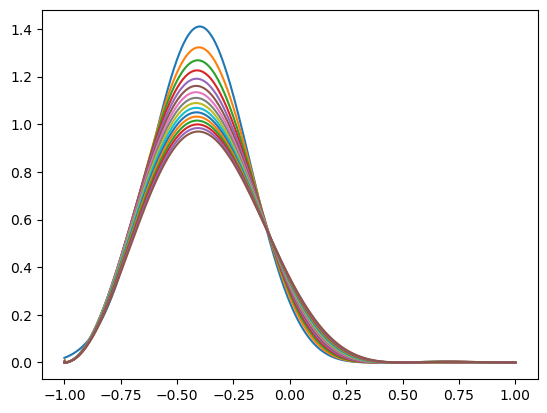

In [40]:
for i in range(0, 4000, 250):
    plt.plot(x, np.abs(psi_t[i])**2)